In [1]:
! pip3 install -U langchain-google-vertexai langchain langgraph langchain_community langchainhub roslibpy langchain-openai openai pillow opencv-python matplotlib

# Controlling Turtlebot3 with LLMs

Testing ideas from paper RAG papers into a RAG agent:

- **Turtlebot3 Localizarion:** Lcalize the robot on a 4x5 grid.
- **Path Planning:** Generate a path to move the robot to a new given location on the grid.


In [1]:
import os
os.environ['LANGCHAIN_TRACING_V2'] = 'true'
os.environ['LANGCHAIN_ENDPOINT'] = 'https://api.smith.langchain.com'
os.environ['LANGCHAIN_API_KEY'] = ' '

## Tools

In [2]:
import sys
# Add the project directory to the Python path
sys.path.append('/tools')
from tools.dino_tool import DinoPromptRun
from tools.location_tool import LocationToolRun

test_tools = False

if test_tools:
    dino = DinoPromptRun()
    bbox = dino.run({})
    location_tool = LocationToolRun()

    bbox = [str(b) for b in bbox]
    location = location_tool.run({'bbox':bbox})
    print(f'Turtlebot3 location on grid: {location}')
    

# ReAct Agent


In [3]:
from langchain import hub
import os
os.environ['GOOGLE_CLOUD_PROJECT'] = ''
from langchain_core.messages import HumanMessage
from langchain_google_vertexai import ChatVertexAI
from langgraph.prebuilt import create_react_agent


# Get the prompt to use - you can modify this!
prompt = hub.pull("wfh/react-agent-executor")
prompt.pretty_print()

# Choose the LLM that will drive the agent
llm = ChatVertexAI(model_name="gemini-1.5-pro-001",
                   temperature=0
                   )
tools = [DinoPromptRun(), LocationToolRun()]

agent_executor = create_react_agent(llm, tools, messages_modifier=prompt)

/home/luis/miniconda3/envs/langchain/lib/python3.12/site-packages/google_crc32c/__init__.py:29: RuntimeWarning: As the c extension couldn't be imported, `google-crc32c` is using a pure python implementation that is significantly slower. If possible, please configure a c build environment and compile the extension
  warnings.warn(_SLOW_CRC32C_WARNING, RuntimeWarning)


================================ System Message ================================

You are a helpful assistant.

============================= Messages Placeholder =============================

{{messages}}


I0000 00:00:1722966060.906884 2688653 config.cc:230] gRPC experiments enabled: call_status_override_on_cancellation, event_engine_dns, event_engine_listener, http2_stats_fix, monitoring_experiment, pick_first_new, trace_record_callops, work_serializer_clears_time_cache


Connecting to ROS...


/tmp/ipykernel_2688653/287645765.py:19: LangGraphDeprecationWarning: Parameter 'messages_modifier' in function 'create_react_agent' is deprecated as of version 0.1.9 and will be removed in version 0.2.0. Use 'state_modifier' parameter instead.
  agent_executor = create_react_agent(llm, tools, messages_modifier=prompt)


In [6]:
inputs = {"messages": [HumanMessage(content="Monitor the turtlebot3 robot and then generate a path to move it to location (1,2). The path should be a list of step actions one at a time from up, down, right and left.")]} 
agent_executor.invoke(inputs)

Calling dino tool
Calling location tool


{'messages': [HumanMessage(content='Monitor the turtlebot3 robot and then generate a path to move it to location (1,2). The path should be a list of step actions one at a time from up, down, right and left.', id='88732b33-99a5-4ada-b031-8577f6b32b03'),
  AIMessage(content='', additional_kwargs={'function_call': {'name': 'dinoDetectionTool', 'arguments': '{}'}}, response_metadata={'is_blocked': False, 'safety_ratings': [{'category': 'HARM_CATEGORY_HATE_SPEECH', 'probability_label': 'NEGLIGIBLE', 'blocked': False, 'severity': 'HARM_SEVERITY_NEGLIGIBLE'}, {'category': 'HARM_CATEGORY_DANGEROUS_CONTENT', 'probability_label': 'NEGLIGIBLE', 'blocked': False, 'severity': 'HARM_SEVERITY_LOW'}, {'category': 'HARM_CATEGORY_HARASSMENT', 'probability_label': 'NEGLIGIBLE', 'blocked': False, 'severity': 'HARM_SEVERITY_NEGLIGIBLE'}, {'category': 'HARM_CATEGORY_SEXUALLY_EXPLICIT', 'probability_label': 'NEGLIGIBLE', 'blocked': False, 'severity': 'HARM_SEVERITY_NEGLIGIBLE'}], 'usage_metadata': {'prompt_t

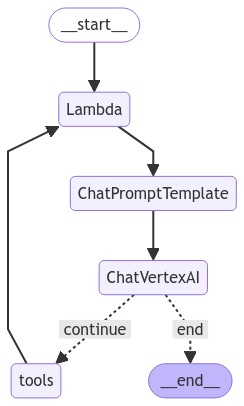

In [8]:
from IPython.display import Image, display

display(Image(agent_executor.get_graph(xray=True).draw_mermaid_png()))